In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the application dataset
application=pd.read_csv(r"C:\PGP\DATA TOOLKIT MODULE 1\CASE STUDY\application_data.csv")
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#looking for NA value in the dataset
application.isna().sum().sort_values(ascending=False).head(60)


COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [4]:
#If a column contains 33% or more than 33% as missing value we will not take that column for our analysis
application=application[application.columns[application.isnull().sum()<(len(application)/3)]]
application.shape

(307511, 73)

In [5]:
#Looking for NA value in the updated dataset
application.isna().sum().sort_values(ascending=False).head(50)


OCCUPATION_TYPE               96391
EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
NAME_TYPE_SUITE                1292
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
FLAG_DOCUMENT_17                  0
FLAG_DOCUMENT_18                  0
FLAG_DOCUMENT_21                  0
FLAG_DOCUMENT_20                  0
FLAG_DOCUMENT_19                  0
FLAG_DOCUMENT_2                   0
FLAG_DOCUMENT_3                   0
FLAG_DOCUMENT_4                   0
FLAG_DOCUMENT_5                   0
FLAG_DOCUMENT_16            

In [6]:
#checking missing value percentage in column
missing= (1-(application.count()/len(application)))*100
missing.sort_values(ascending=False).head(60)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


In [7]:
#Dropping EXT_SOURCE_3, EXT_SOURCE_2 as it is not so helpful to draw insights with respect to loans
application.drop(['EXT_SOURCE_3', 'EXT_SOURCE_2'],axis=1,inplace= True)

In [8]:
#checking for categorical column
list(set(application.columns) - set(application.describe().columns))

['NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'FLAG_OWN_REALTY',
 'NAME_HOUSING_TYPE',
 'FLAG_OWN_CAR',
 'WEEKDAY_APPR_PROCESS_START',
 'CODE_GENDER',
 'ORGANIZATION_TYPE',
 'OCCUPATION_TYPE',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS']

In [9]:
#checking for numerical column
application.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10',

- After Analysing filling all the NA values of CREDIT_BUREAU AND SOCIAL_CIRCLE COLUMNS with mode in the dataset.

In [10]:
application['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(application['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0],inplace=True)
application['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(application['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0],inplace=True)
application['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(application['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0],inplace=True)
application['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(application['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0],inplace=True)
application['AMT_REQ_CREDIT_BUREAU_MON'].fillna(application['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0],inplace=True)
application['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(application['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0],inplace=True)
application['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(application['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)
application['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(application['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)
application['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(application['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)
application['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(application['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)


In [11]:
#checking missing value percentage in column
missing2= (1-(application.count()/len(application)))*100
missing2.sort_values(ascending=False).head(60)

OCCUPATION_TYPE                31.345545
NAME_TYPE_SUITE                 0.420148
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_4                 0.000000
SK_ID_CURR                      0.000000
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_2                 0.000000
DEF_60_CNT_SOCIAL_CIRCLE        0.000000
OBS_60_CNT_SOCIAL_CIRCLE        0.000000
DEF_30_CNT_SOCIAL_CIRCLE        0.000000
OBS_30_CNT_SOCIAL_CIRCLE        0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_12                0.000000
FLAG_DOCUMENT_11                0.000000
FLAG_DOCUMENT_20                0.000000
AMT_REQ_CREDIT_BUREAU_QRT       0.000000
AMT_REQ_CREDIT_B

In [12]:
#Handling missing values of NAME_TYPE_SUITE with mode which is unaccompained 
application['NAME_TYPE_SUITE'].fillna(application['NAME_TYPE_SUITE'].mode()[0],inplace=True)

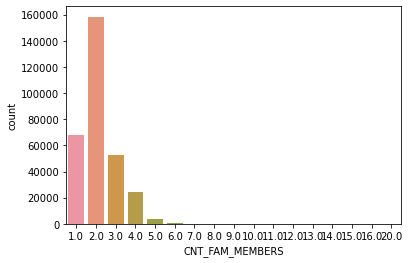

In [13]:
#OBSERVING CNT_FAM_MEMBERS and replace NA value with mode
sns.countplot(x='CNT_FAM_MEMBERS', data=application)
application['CNT_FAM_MEMBERS'].fillna(application['CNT_FAM_MEMBERS'].mode()[0],inplace=True)

- So we deal with maximum missing values except OCCUPATION_TYPE, AMT_GOODS_PRICE,AMT_ANNUITY as replacing these column may give us some inappropiate insights.

# TARGET

In [14]:
#check the number of payment difficulties for clients
application['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

- Checking for data imbalance

In [15]:
(application['TARGET']==0).sum()/(application['TARGET']==1).sum()

11.387150050352467

- As there is an imbalance in the data, we will separate out the data with target=0 and train with target=1 and we will analyze them individually.


In [16]:
target_0=application.loc[application['TARGET']==0]
target_1=application.loc[application['TARGET']==1]

- Storing Categorical and Numerical columns for analysis

In [17]:
#categorical column
cat_col = list(set(application.columns) - set(application.describe().columns))
cat_col
#numerical column
num_col = application.describe().columns
num_col

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10',

# PLOT

- Plot for categorical_columns

Plotting NAME_INCOME_TYPE


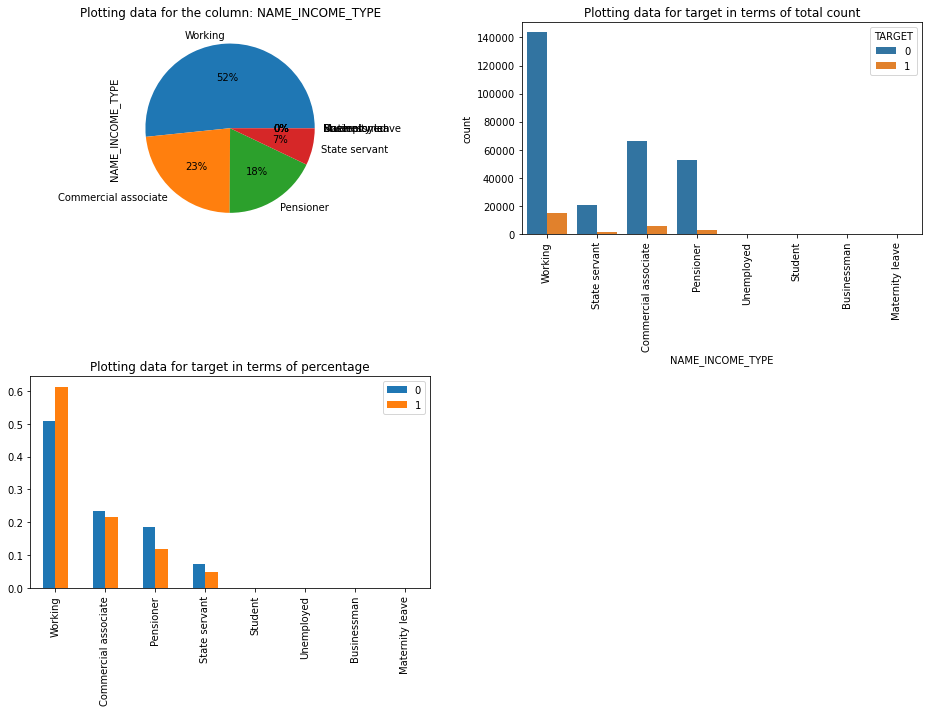



Plotting NAME_TYPE_SUITE


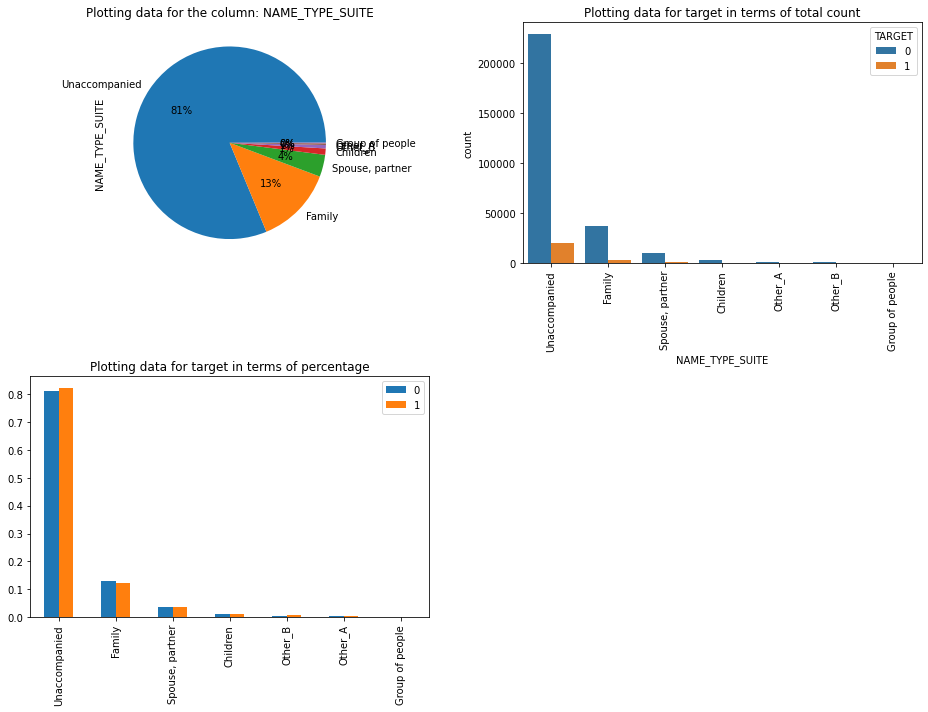



Plotting FLAG_OWN_REALTY


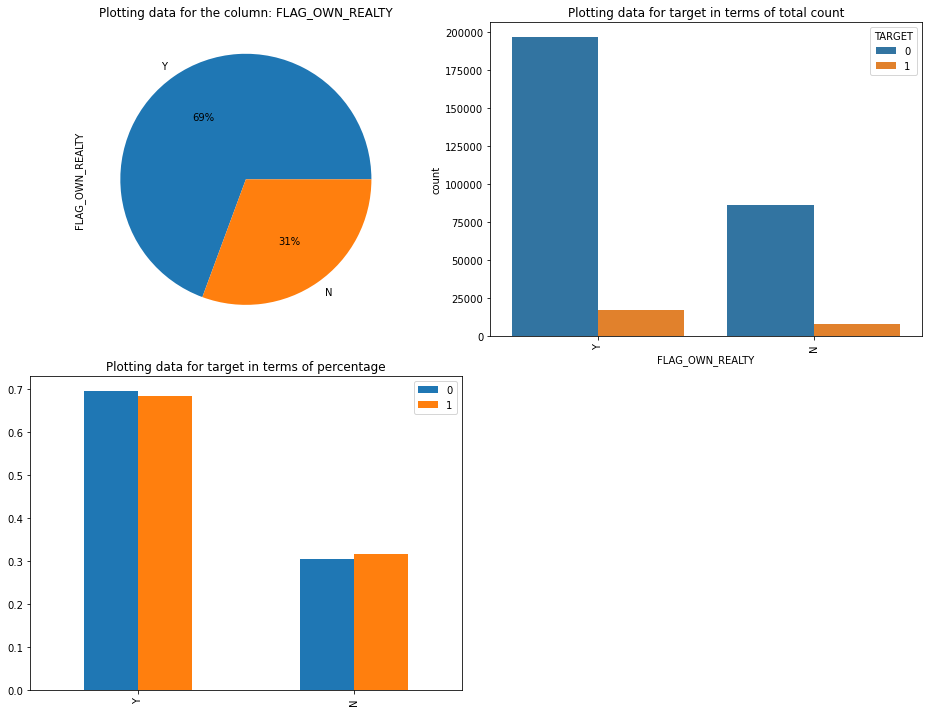



Plotting NAME_HOUSING_TYPE


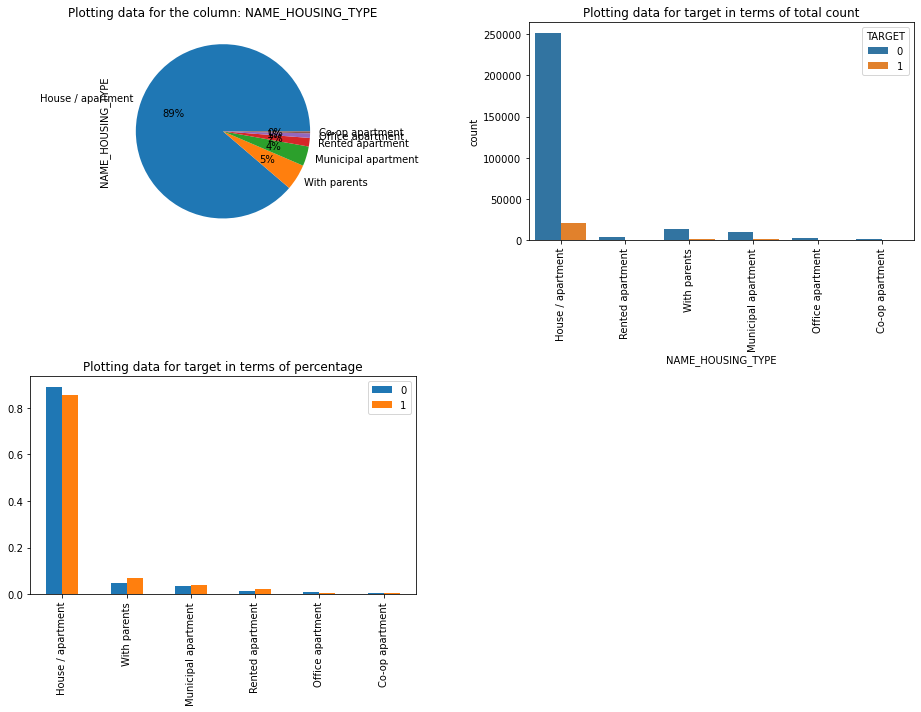



Plotting FLAG_OWN_CAR


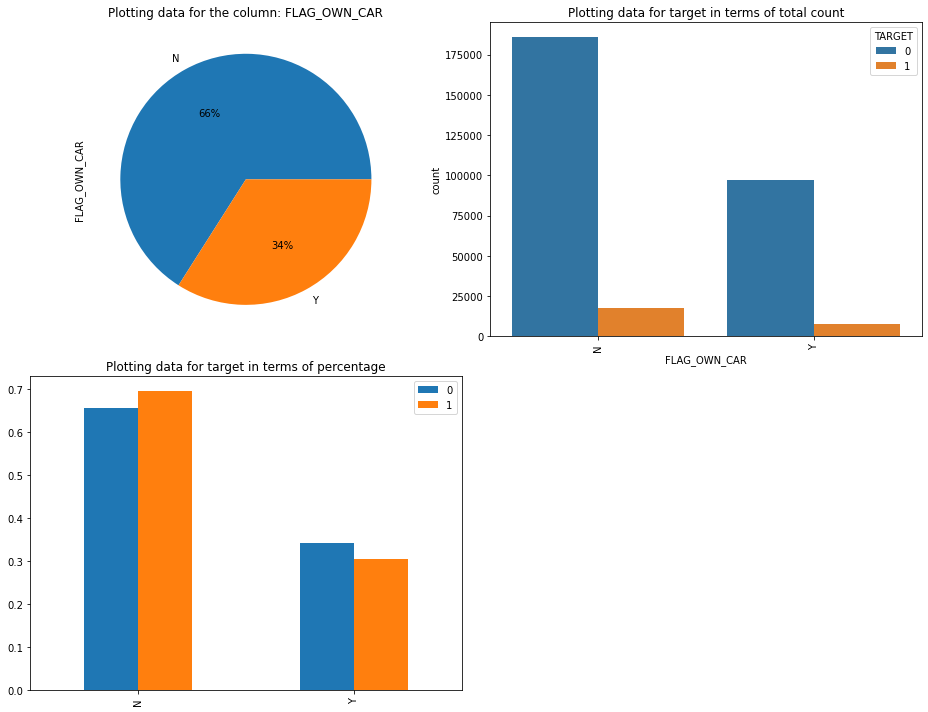



Plotting WEEKDAY_APPR_PROCESS_START


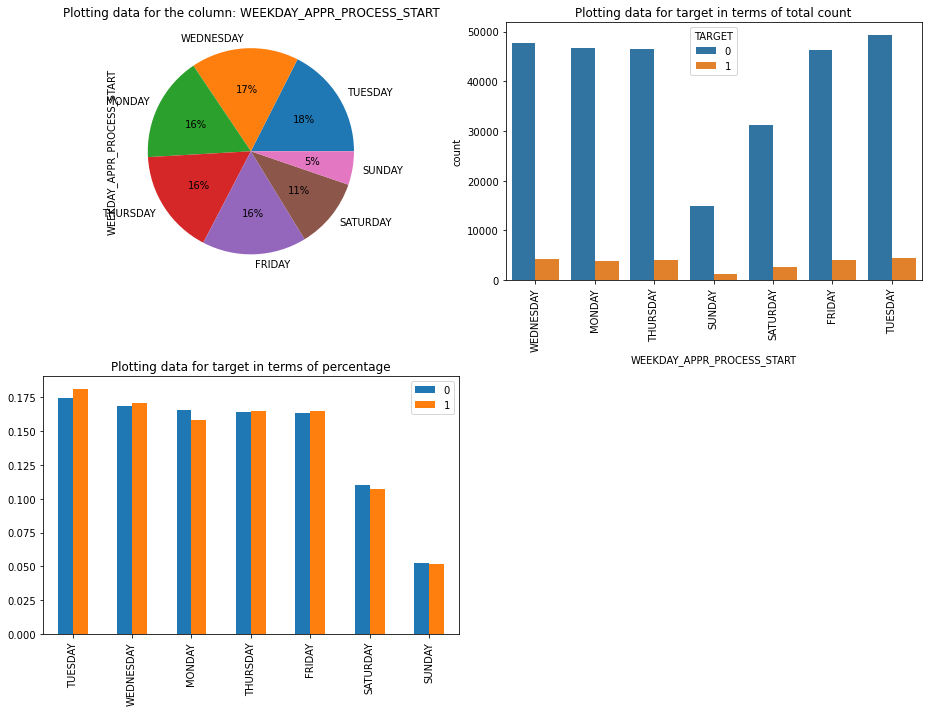



Plotting CODE_GENDER


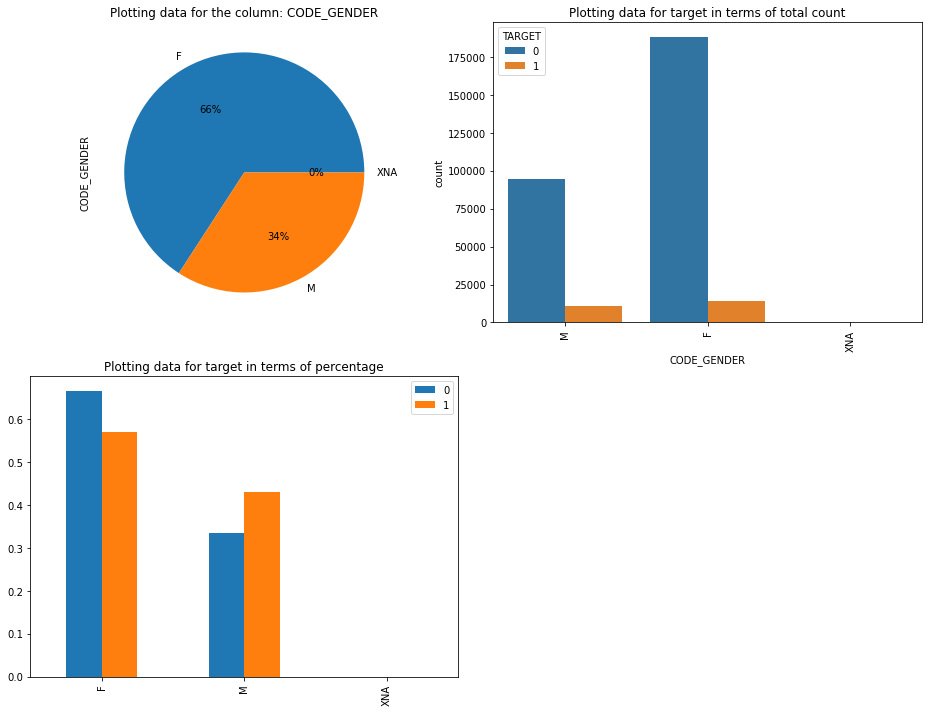



Plotting ORGANIZATION_TYPE


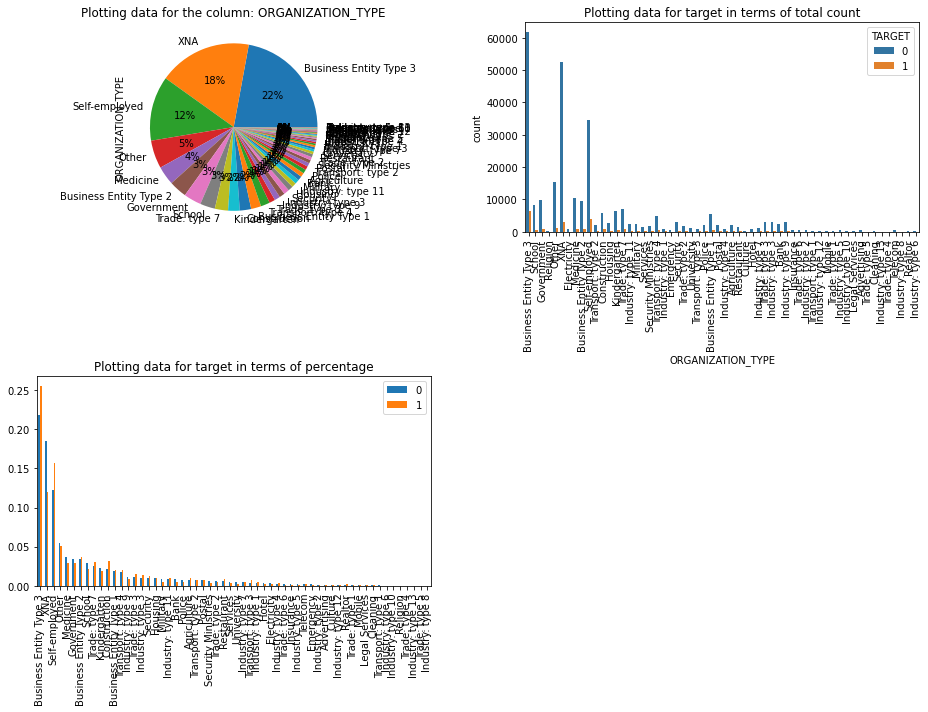



Plotting OCCUPATION_TYPE


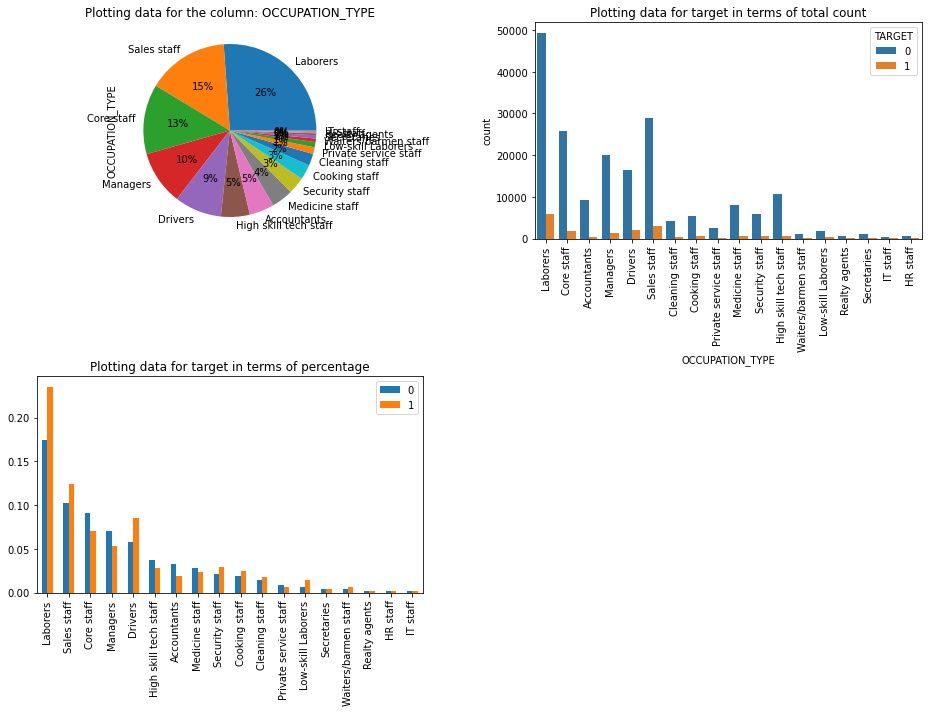



Plotting NAME_CONTRACT_TYPE


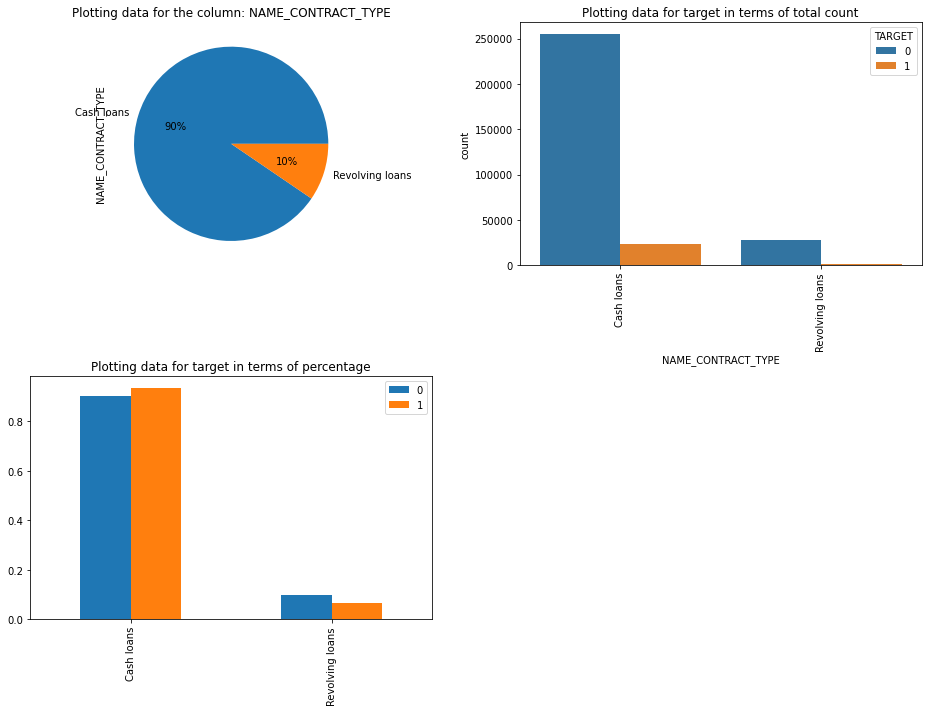



Plotting NAME_EDUCATION_TYPE


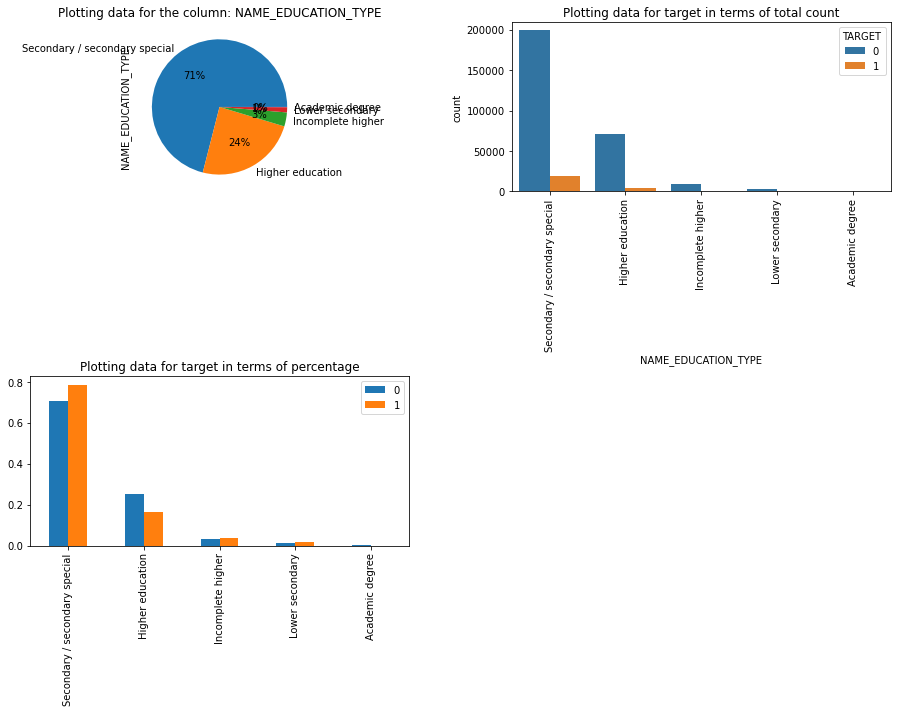



Plotting NAME_FAMILY_STATUS


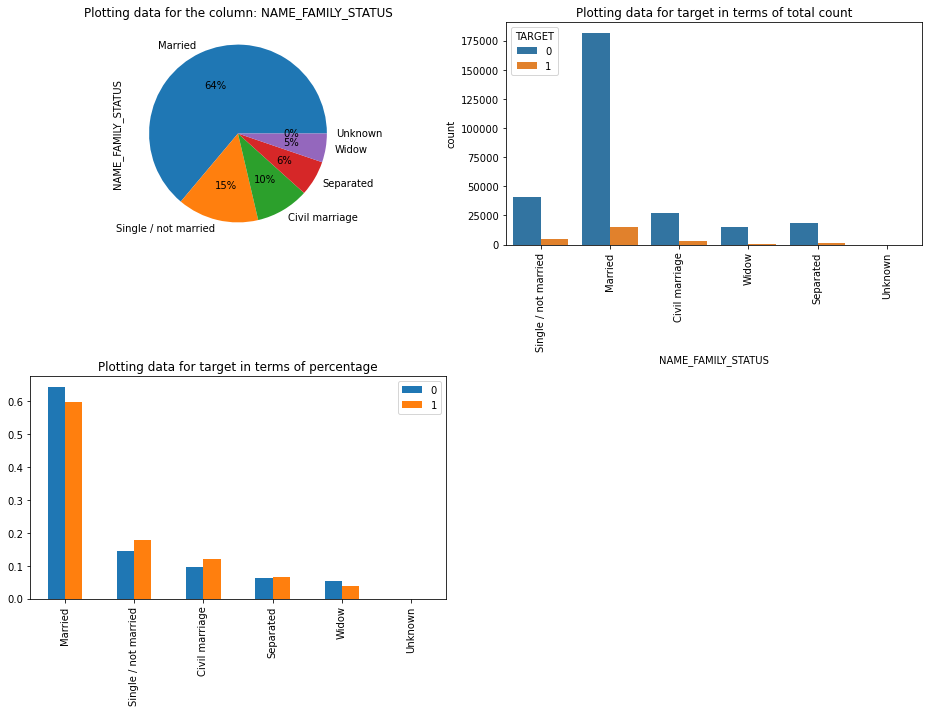

In [18]:
def plotting(application, target0, target1, column):
    
    application = application
    target_0 = target0
    target_1 = target1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    application[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = application, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    application = pd.DataFrame()
    application['0']= ((target_0[col].value_counts())/len(target_0))
    application['1']= ((target_1[col].value_counts())/len(target_1))
    application.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() 

    plt.show()
    
for column in cat_col:
    print('Plotting',column)
    plotting(application,target_0,target_1,column)
    print("\n================\n")

## INSIGHTS FROM THE ABOVE PLOT

- More than half people(52%) are salaried person who applied for loan but default rate is in around 60% for this section.
- Maximum people have their own house or apartment.
- More number of Female applied for the loan compared to male, but default rate is high in Male compared to Female.
- 26% people are labours who applied for loan but on time payment(not a defaulter) percentage is much lower in this section.
- Most of the client take loan for secondary education But the default rate in secondary education is much higher than higher education
- Maximum clients are married who applied for loan

# Plot For Numerical Columns

####  Plot For Target=0

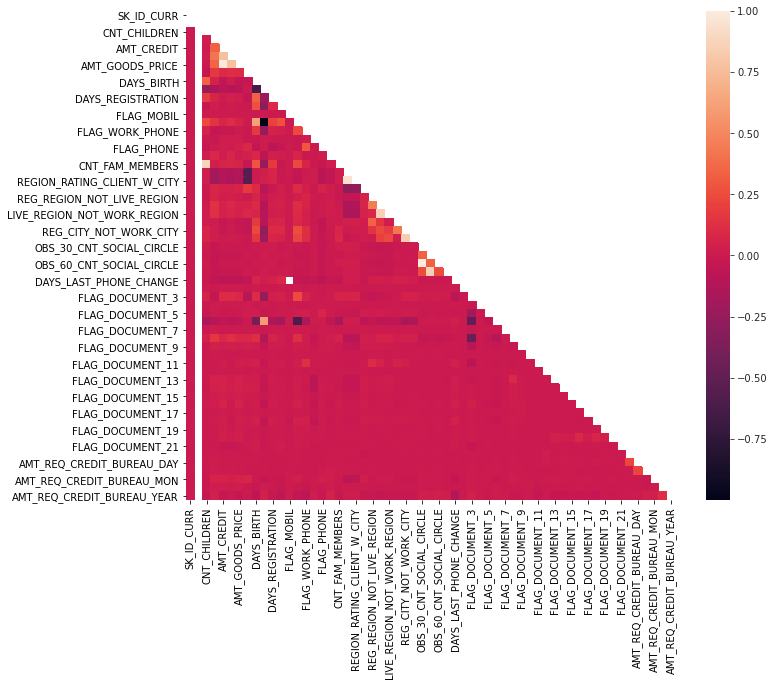

In [19]:
import numpy as np
corr = target_0.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)

#### FINDING THE TOP CORRELATION FOR TARGET=0

In [20]:
target_0.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,-0.001346,0.001744,...,0.001194,0.000676,0.000832,-0.000485,-1.773820e-03,-0.001626,0.002298,-0.000037,0.000963,0.003517
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000716,NaN,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.024363,0.336966,-0.243356,...,0.004181,0.001078,0.001302,-0.002983,1.466564e-04,0.001057,-0.000315,-0.007640,-0.004218,-0.030513
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,0.062609,-0.141250,...,0.008214,0.005762,0.000840,-0.000869,2.707037e-03,0.008029,0.008647,0.058682,0.017676,0.042522
AMT_CREDIT,-0.000342,NaN,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,-0.047378,-0.072515,...,0.035527,0.021560,0.032151,-0.015602,-2.267017e-03,0.005135,0.000941,0.055063,0.021825,-0.027599
AMT_ANNUITY,0.000068,NaN,0.020905,0.418953,0.771309,1.000000,0.776686,0.120988,0.012263,-0.106425,...,-0.008344,0.004964,0.012736,-0.016527,3.219709e-03,0.002464,0.012386,0.036294,0.011660,-0.005584
AMT_GOODS_PRICE,-0.000205,NaN,-0.000525,0.349462,0.987250,0.776686,1.000000,0.103827,-0.044565,-0.071051,...,0.034093,0.020772,0.032866,-0.013962,-1.703396e-03,0.005507,0.001176,0.056649,0.022122,-0.029890
REGION_POPULATION_RELATIVE,0.000360,NaN,-0.024363,0.167851,0.100604,0.120988,0.103827,1.000000,-0.025244,-0.006961,...,0.013496,0.002656,-0.000112,0.003275,-2.334085e-03,0.001629,-0.002814,0.071495,-0.001954,-0.001427
DAYS_BIRTH,-0.001346,NaN,0.336966,0.062609,-0.047378,0.012263,-0.044565,-0.025244,1.000000,-0.618048,...,0.046491,0.003977,0.009797,0.026466,2.925562e-03,0.001587,-0.003570,-0.001871,-0.015427,-0.077657
DAYS_EMPLOYED,0.001744,NaN,-0.243356,-0.141250,-0.072515,-0.106425,-0.071051,-0.006961,-0.618048,1.000000,...,-0.041577,-0.010249,-0.010267,-0.008285,-4.379903e-03,-0.000908,0.001703,-0.033653,0.013263,0.043039


In [21]:
# AS WE HAVE TO FIND TOP CORRELATION THAT CAN BE POSITIVE AND NEGATIVE BOTH SO WE WILL TAKE ABS VALUE
target_0.corr().abs().unstack().sort_values()

AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_DOCUMENT_15              2.064400e-07
FLAG_DOCUMENT_15            AMT_REQ_CREDIT_BUREAU_HOUR    2.064400e-07
FLAG_DOCUMENT_12            FLAG_MOBIL                    5.002798e-06
FLAG_MOBIL                  FLAG_DOCUMENT_12              5.002798e-06
DAYS_REGISTRATION           AMT_REQ_CREDIT_BUREAU_DAY     9.268956e-06
                                                              ...     
AMT_REQ_CREDIT_BUREAU_DAY   TARGET                                 NaN
AMT_REQ_CREDIT_BUREAU_WEEK  TARGET                                 NaN
AMT_REQ_CREDIT_BUREAU_MON   TARGET                                 NaN
AMT_REQ_CREDIT_BUREAU_QRT   TARGET                                 NaN
AMT_REQ_CREDIT_BUREAU_YEAR  TARGET                                 NaN
Length: 3481, dtype: float64

In [22]:
#we will DROP the NA values
correlation_0=target_0.corr().abs().unstack().sort_values(kind='quicksort').dropna()

In [23]:
#For Finding Top Correlation we will not consider the value 1.0
correlation_0 = correlation_0[correlation_0!=1]
correlation_0

AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_DOCUMENT_15              2.064400e-07
FLAG_DOCUMENT_15            AMT_REQ_CREDIT_BUREAU_HOUR    2.064400e-07
FLAG_DOCUMENT_12            FLAG_MOBIL                    5.002798e-06
FLAG_MOBIL                  FLAG_DOCUMENT_12              5.002798e-06
DAYS_REGISTRATION           AMT_REQ_CREDIT_BUREAU_DAY     9.268956e-06
                                                              ...     
AMT_GOODS_PRICE             AMT_CREDIT                    9.872505e-01
OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE      9.985103e-01
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE      9.985103e-01
FLAG_EMP_PHONE              DAYS_EMPLOYED                 9.997584e-01
DAYS_EMPLOYED               FLAG_EMP_PHONE                9.997584e-01
Length: 3304, dtype: float64

- For getting top 10 correlation we have to select the last 20 values as correlation between two same variable repeat once 

In [24]:
corr=correlation_0.tail(20)
corr.iloc[::-2]

DAYS_EMPLOYED                FLAG_EMP_PHONE                0.999758
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE      0.998510
AMT_GOODS_PRICE              AMT_CREDIT                    0.987250
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.950149
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.878571
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.861861
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.859371
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.830381
AMT_GOODS_PRICE              AMT_ANNUITY                   0.776686
AMT_ANNUITY                  AMT_CREDIT                    0.771309
dtype: float64

- THESE ARE THE TOP 10 CORRELATION

In [25]:
pd.DataFrame(corr.iloc[::-2])

,,0
DAYS_EMPLOYED,FLAG_EMP_PHONE,0.999758
OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998510
AMT_GOODS_PRICE,AMT_CREDIT,0.987250
REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861
DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859371
LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381
AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
AMT_ANNUITY,AMT_CREDIT,0.771309


### Finding Top Correlation For Target=1 In the same way

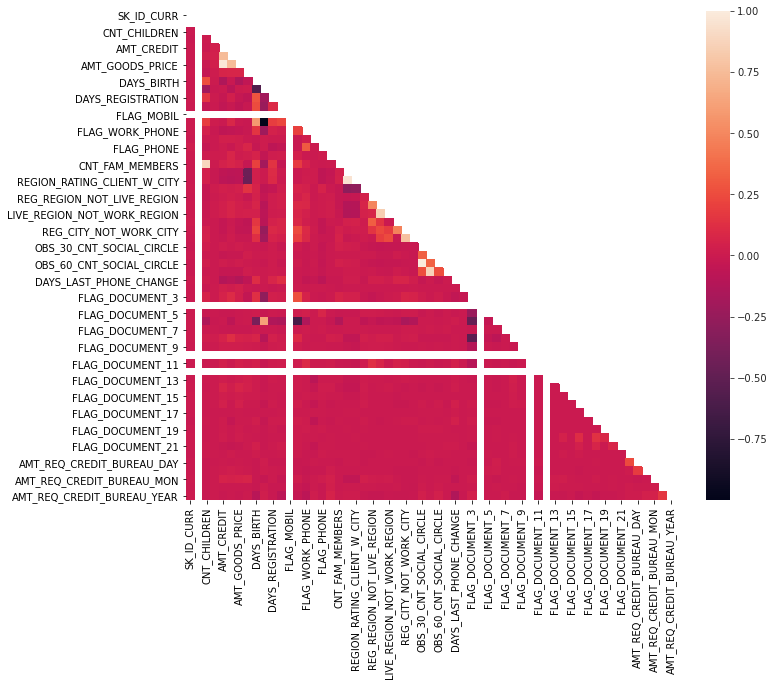

In [26]:
import numpy as np
corr = target_1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)

In [27]:
correlation_1=target_1.corr().abs().unstack().sort_values(kind='quicksort').dropna()

In [28]:
correlation_1 = correlation_1[correlation_1!=1]
corr_1= correlation_1.tail(20)
corr_1

AMT_CREDIT                   AMT_ANNUITY                    0.752195
AMT_ANNUITY                  AMT_CREDIT                     0.752195
                             AMT_GOODS_PRICE                0.752699
AMT_GOODS_PRICE              AMT_ANNUITY                    0.752699
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.778540
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.778540
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.847885
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.847885
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.869016
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.869016
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885484
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885484
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956637
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956637
AMT_GOODS_PRICE              AMT_C

- These are the top 10 correlation

In [29]:
pd.DataFrame(corr_1.iloc[::-2])

,,0
DAYS_EMPLOYED,FLAG_EMP_PHONE,0.999702
OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998270
AMT_CREDIT,AMT_GOODS_PRICE,0.983103
REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.956637
CNT_CHILDREN,CNT_FAM_MEMBERS,0.885484
DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.869016
LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885
LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540
AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
AMT_ANNUITY,AMT_CREDIT,0.752195


## ANALYSIS THROUGH BOXPLOT

In [30]:
#CATEGORICAL COLUMNS
categorical_col=application.select_dtypes(include=['int64','float64']).columns
categorical_col

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10',

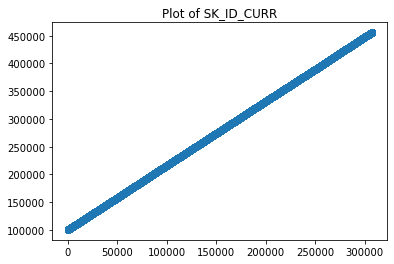

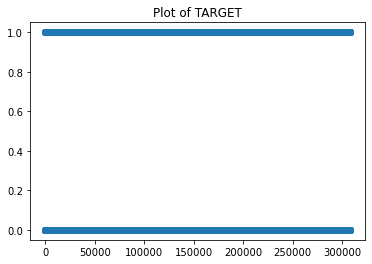

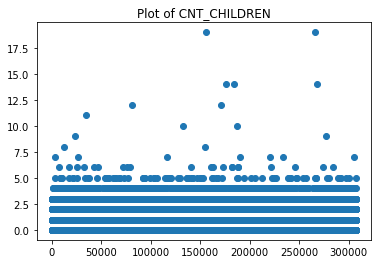

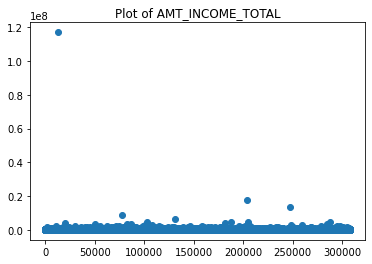

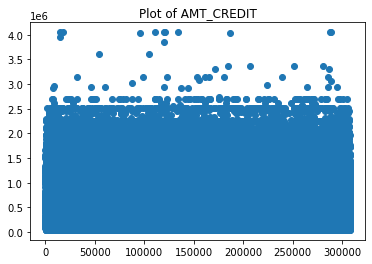

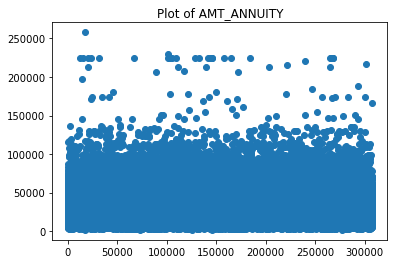

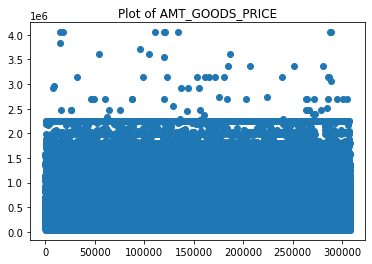

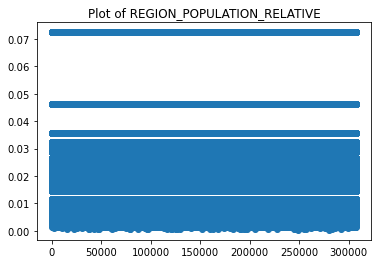

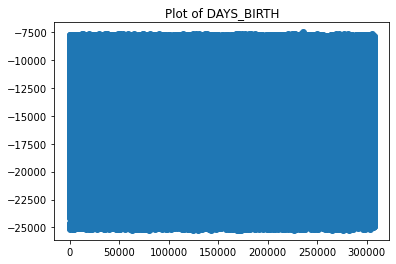

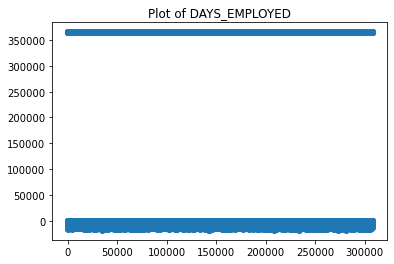

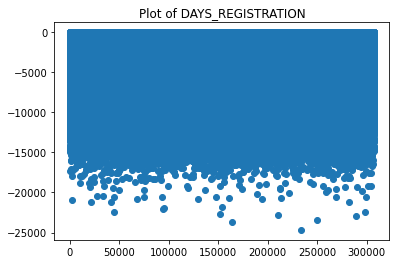

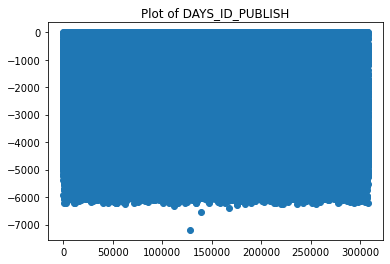

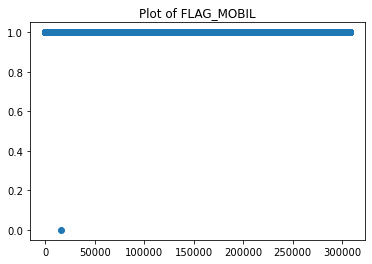

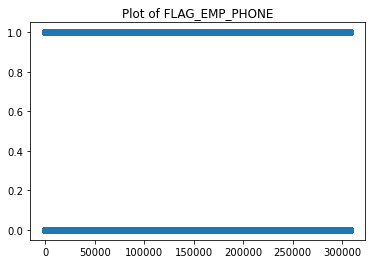

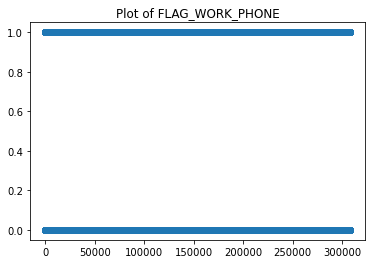

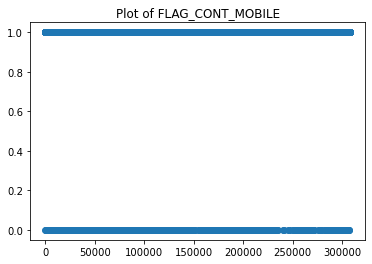

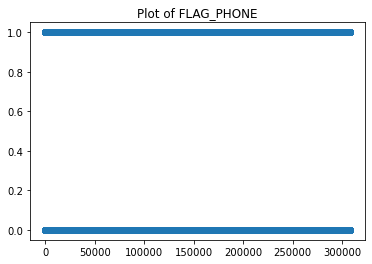

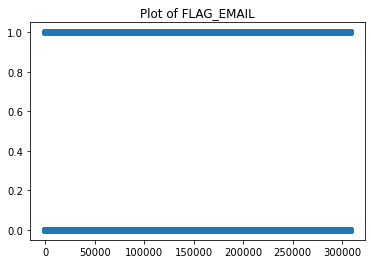

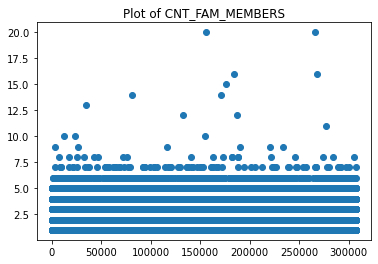

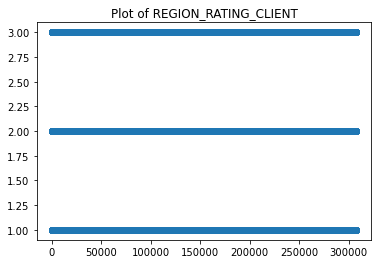

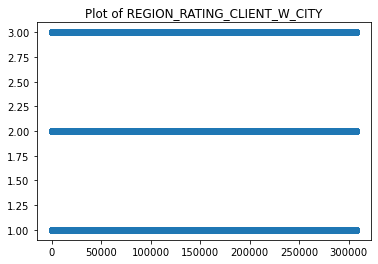

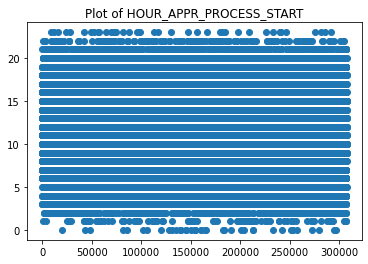

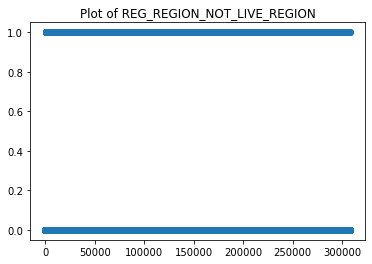

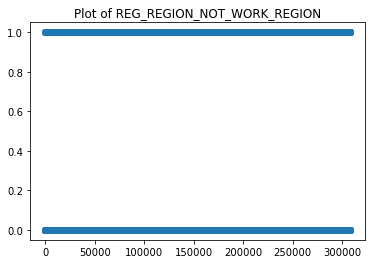

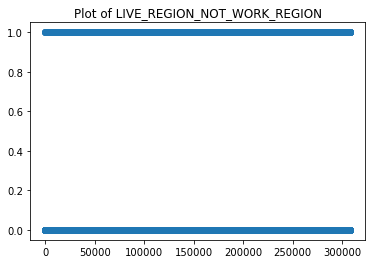

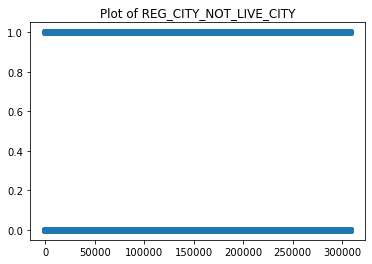

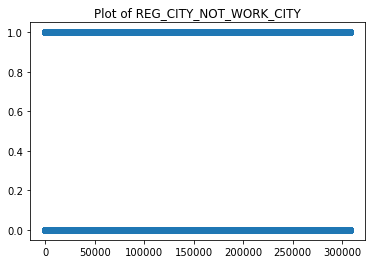

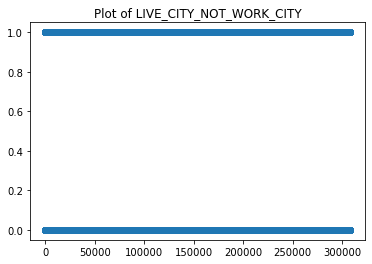

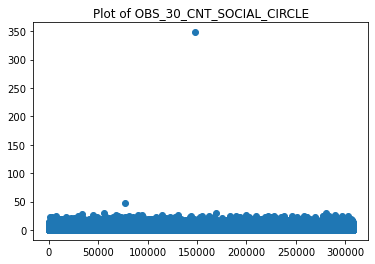

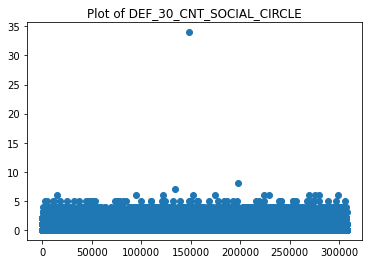

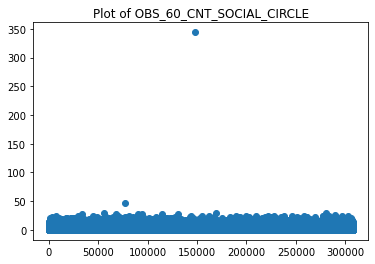

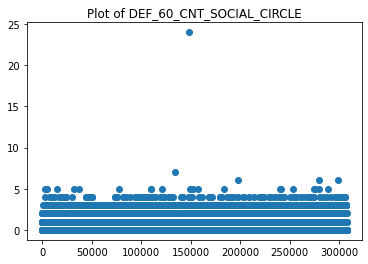

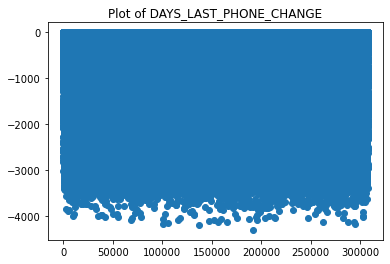

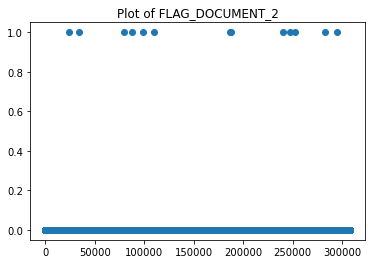

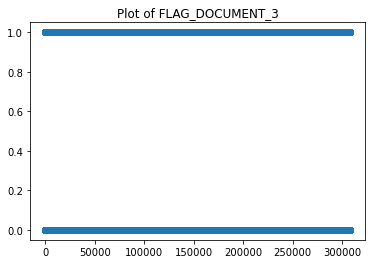

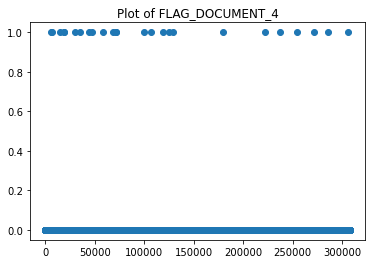

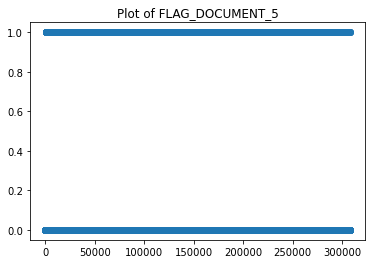

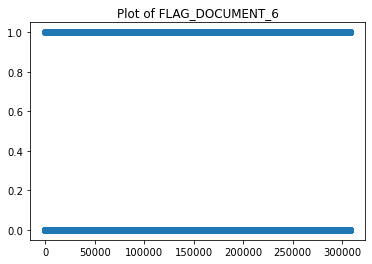

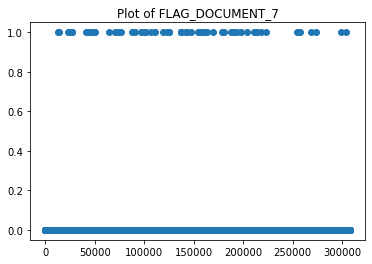

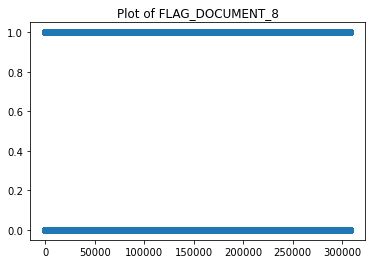

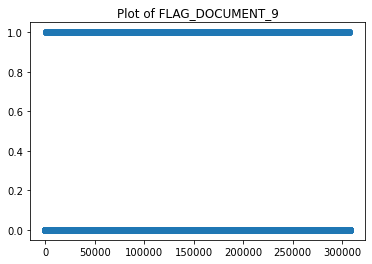

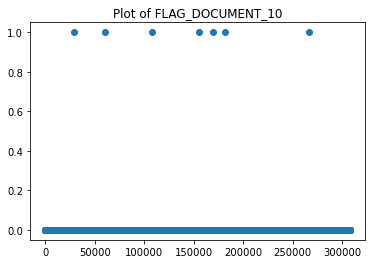

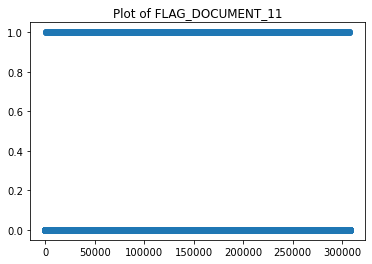

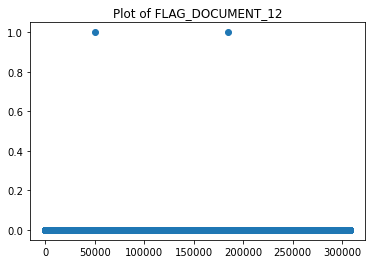

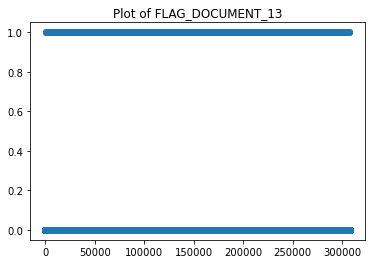

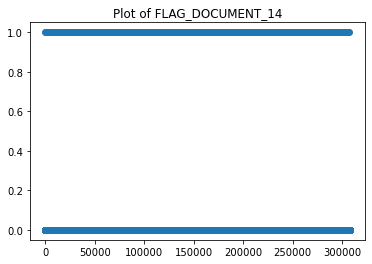

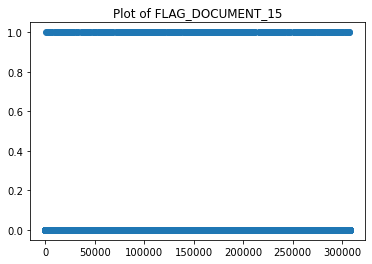

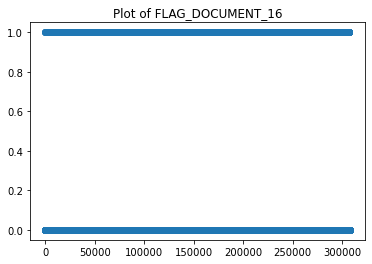

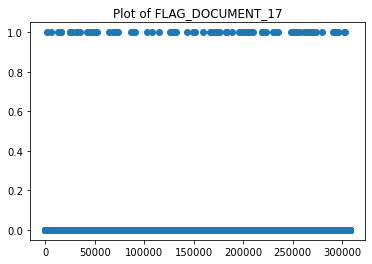

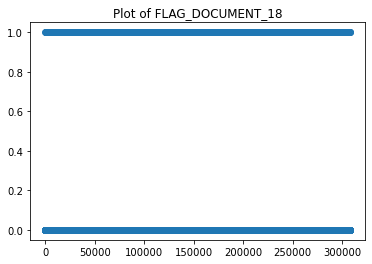

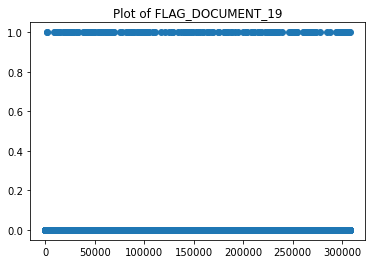

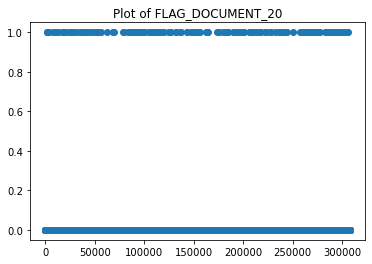

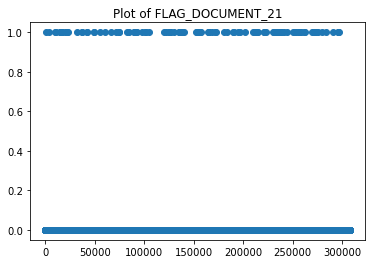

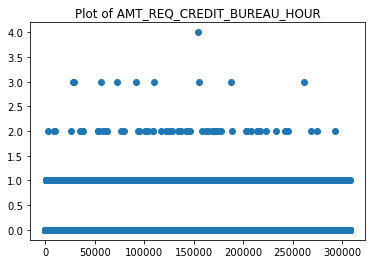

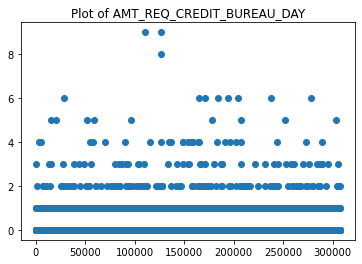

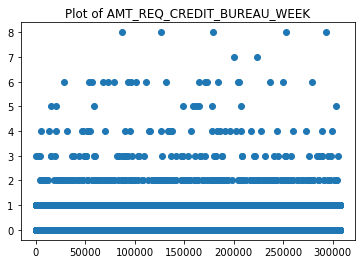

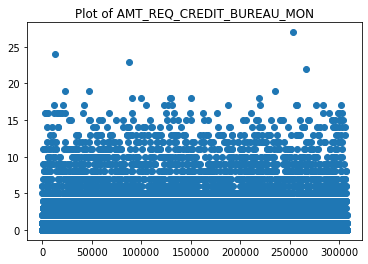

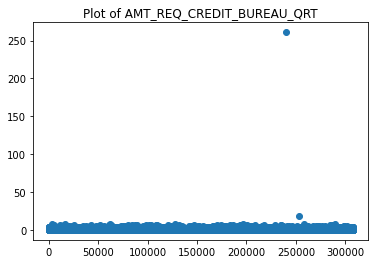

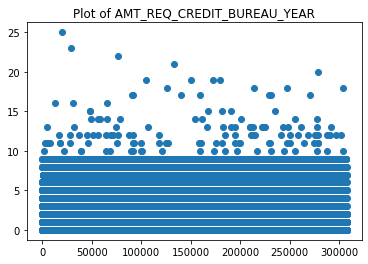

In [31]:
for column in categorical_col:
    title = "Plot of "+column
    plt.scatter(application.index, application[column])
    plt.title(title)
    plt.show()
    print("\n=======================================\n")

## OUTLIER ANALYSIS

- Some people have more than 10 children.
- Some people have a very high income range.
- Few people have a huge income.
- Some people have more than 12 members in Family.
- Few people don't have mobile phone.
- Some people changed their last phone nearly 4000 days(11 years) ago.
- For some people number of enquiries to credit bureau about the client one day before application is more than 6.

#### OBSERVING AMT_ANNUITY COLUMN

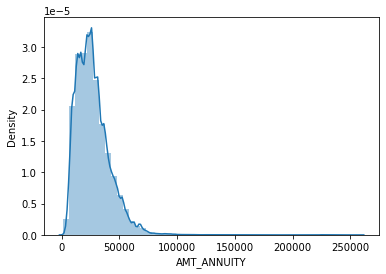

In [32]:
sns.distplot(application['AMT_ANNUITY'].dropna())
plt.show()

- Converting AMT_ANNUITY To Categorical for analysis

In [33]:
def annuity(a):
    if a<=20000:
        return 'low'
    elif a>20000 and a<=50000:
        return 'medium'
    elif a>50000 and a<=100000:
        return 'high'
    else:
        return 'very high'

application['AMT_ANNUITY']=application.AMT_ANNUITY.apply(lambda x: annuity(x))

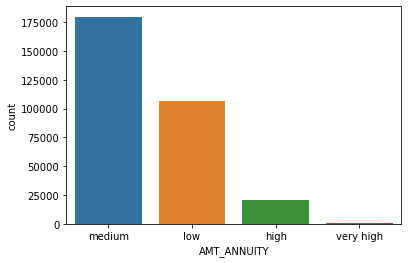

In [34]:
sns.countplot(x='AMT_ANNUITY', data=application)
plt.show()

# READING PREVIOUS APPLICATION DATASET

In [35]:
prev_application= pd.read_csv(r"C:\PGP\DATA TOOLKIT MODULE 1\CASE STUDY\previous_application.csv")

In [36]:
prev_application.shape

(1670214, 37)

In [37]:
prev_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
prev_application.SK_ID_PREV.value_counts()

1001961    1
1210139    1
1279781    1
1281828    1
1292067    1
          ..
2444802    1
2446849    1
2448896    1
1024863    1
1000983    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64

In [39]:
prev_application.SK_ID_CURR.value_counts()

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
310932     1
308885     1
317081     1
335520     1
350314     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

- In SK_ID_PREV There are 1670214 values where as in SK_ID_CURR There are only 338857 values which tells us there are duplicate numbers of SK_ID_PREV

### Merging of Two DataFrames

In [40]:
merge_application = application.merge(prev_application, left_on='SK_ID_CURR', 
                                         right_on='SK_ID_CURR', how='inner')


### Dividing The dataset on TARGET=0 AND TARGET=1 

In [41]:
merge_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,medium,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,medium,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,medium,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,medium,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,low,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [69]:
#FOR MERGE DATASET
mtarget_0=merge_application.loc[merge_application['TARGET']==0]
mtarget_1=merge_application.loc[merge_application['TARGET']==1]
mtarget_1['NAME_CONTRACT_STATUS']

0          Approved
161        Approved
162        Approved
163         Refused
164        Approved
             ...   
1413559    Approved
1413601    Approved
1413602    Approved
1413691    Approved
1413692    Approved
Name: NAME_CONTRACT_STATUS, Length: 122360, dtype: object

In [44]:
#FOR APPLICATION DATASET
target_0
target_1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.0,450000.0,32746.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,46809.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,6.0
307481,456225,1,Cash loans,M,N,Y,0,225000.0,297000.0,19975.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
307489,456233,1,Cash loans,F,N,Y,0,225000.0,521280.0,23089.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0


In [61]:
application['NAME_CONTRACT_TYPE']

0              Cash loans
1              Cash loans
2         Revolving loans
3              Cash loans
4              Cash loans
               ...       
307506         Cash loans
307507         Cash loans
307508         Cash loans
307509         Cash loans
307510         Cash loans
Name: NAME_CONTRACT_TYPE, Length: 307511, dtype: object

# PLOT

In [74]:
def plotting(application,merge_application,a,b):
    
    a = a
    b = b
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    application[a].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ a)
    
    ax3 = plt.subplot(223)
    sns.countplot(x= a, hue = b, data = mtarget_0, ax = ax3)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target=0')


    ax2 = plt.subplot(222)
    application = pd.DataFrame()
    application['0']= ((target_0[a].value_counts())/len(target_0))
    application['1']= ((target_1[a].value_counts())/len(target_1))
    application.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of percentage')
    
    ax4 = plt.subplot(224)
    sns.countplot(x= a, hue = b, data = mtarget_1, ax = ax4)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target=1')



    fig.tight_layout() 

    plt.show()


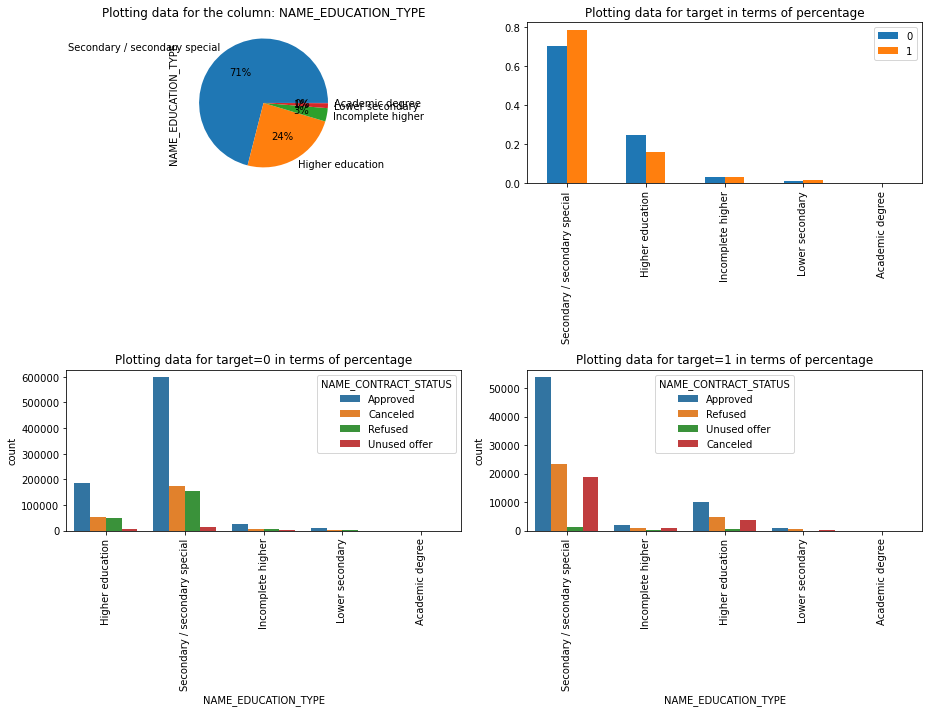

In [75]:
plotting(application,merge_application,'NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')